# **What is Artificial Neural Networks?**
Artificial neural networks (ANN), simply called the neural networks(NN), are computing systems that is inspired by the biological neural networks that constitute human brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

#--- **Structure of ANN**---


# **1.) Artificial neurons:**
Artificial neuron is the elementary units of ANN.  Each node takes multiple weighted inputs, applies the activation function to the summation of these inputs, and in doing so generates an output. 

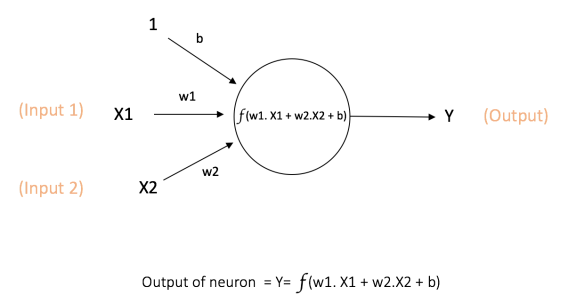

The output of the activation function is shown as h in the above diagram. Note: a node is also called a perceptron in some literature.

The weighted input to the node above would be: 

         x1 * w1 + x2 * w2 + x3 * w3 + b 

Here the wi are weights ,they are the parameters that are changed during the learning process, and along with the input determine the output of the node. 

# **2.)  Activation Function**

###   **Linear or Identity Activation Function**

Equation : f(x) = x

Range : (-infinity to infinity)

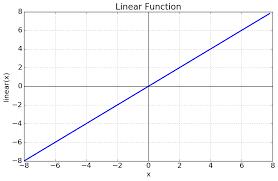

### **Sigmoid or Logistic Activation Function**

Equation: f(x) = 1/(1+e^-x)

Range: (0 to 1) / (-1 to 1)

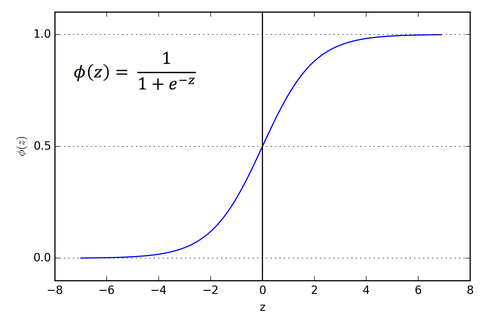

In [1]:
import numpy as np
def sigmoid_function(x):
    z = (1/(1 + np.exp(-x)))
    return z

## **Tanh**

Equation: tanh(x)= 2 * sigmoid(2x)-1

Range: (-1 to 1)

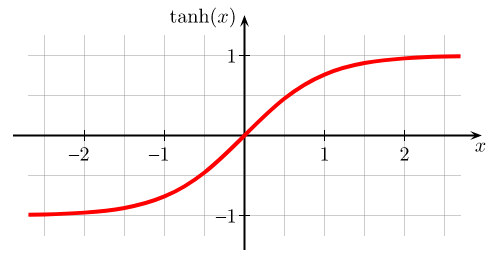

In [2]:
def tanh_function(x):
    z = (2/(1 + np.exp(-2*x))) -1
    return z

## **Relu**

Equation : f(x)=max(0,x)

Range: (0, infinity)

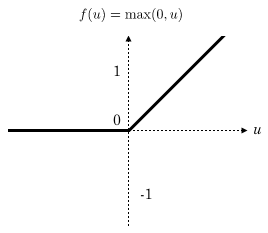

In [3]:
def relu_function(x):
  return 0 if x < 0 else x 

# **3.) The Bias**

Bias allows you to shift the activation function by adding a constant (i.e. the given bias) to the input. Bias in Neural Networks can be thought of as analogous to the role of a constant in a linear function, whereby the line is effectively transposed by the constant value.


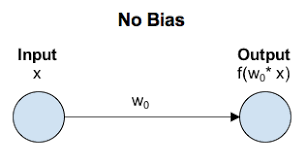

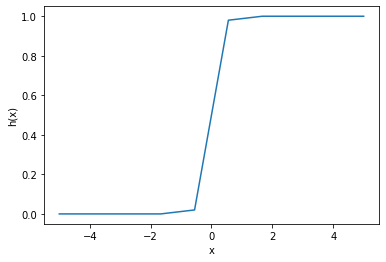

In [4]:
import matplotlib.pyplot as plt
w0 = 7.0
x = np.linspace(-5,5,10)

p = x * w0
af = sigmoid_function(p)
plt.plot(x, af, label = 'w0 = 0.7' )
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

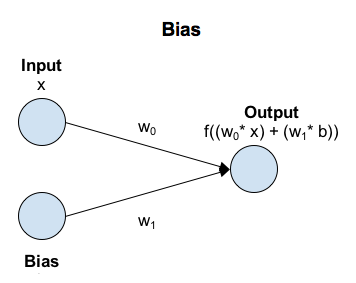

In effect, a bias value allows you to shift the activation function to the left or right. Here, the function shifts to right by 2 units.

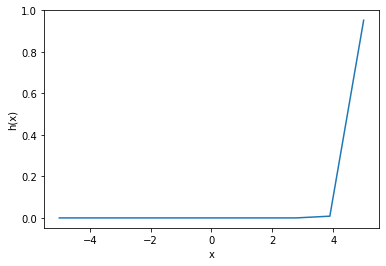

In [5]:
w0 = 7.0
w1 = 4.0
b = -8.0
x = np.linspace(-5,5,10)
p = x * w0 + b * w1
af = sigmoid_function(p)
plt.plot(x, af )
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

# **Putting All together..**

Many such neurons combined together can come in a myriad of different forms, but the most common simple neural network structure consists of an input layer, a hidden layer and an output layer. An example of such a structure can be seen below: 
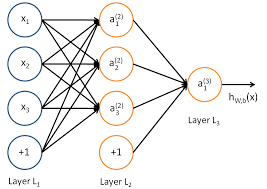

Layer1: Input Layer

Layer2: Hidden Layer

Layer3: Hidden Layer

# **The Notations**
The maths below requires some fairly precise notation so that we know what we are talking about. The notation I am using here is similar to that used in the Stanford deep learning tutorial.
            
**a) Weights:** **'i'** refers to the node number of the connection in layer **(l + 1)** and **j** refers to the node number of the connection in layer **l.**
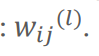

So, for the connection between node 1 in layer 1 and node 2 in layer 2, the weight notation would be 
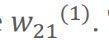

This notation may seem a bit odd. However, this notation makes more sense when you add the bias. 

**b) Bias:**

The bias in layer 1 is connected to the all the nodes in layer two.
Because the bias is not a true node with an activation function, it has no inputs (it always outputs the value +1). The notation of the bias weight is 
Screen Shot 1943-02-24 at 6.58.06 PM.png
 , where i is the node
number in the layer l + 1

So, the weight on the connection between the bias in layer 1 and the second node in layer 2 is given by 
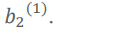

c)Output:

Finally, the node output notation is 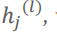
, where j denotes the node number in layer l of the
network. As can be observed in the three layer network above, the output of node 2 in
layer 2 has the notation of 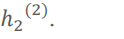

.


---



---




# **Let's Start**

**A) Training Neural Networks / Feed forward Pass**

To demonstrate how to calculate the output from the input in neural networks, 
let's calculate the mathematical functions computed by each of the neurons of previos one hidden layer neural network.

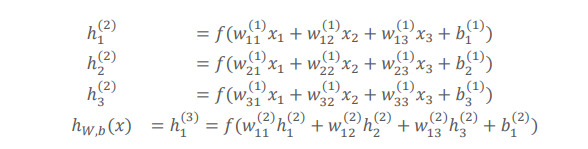

In the equation above f(∙) refers to the node activation function, in this case the sigmoid
function


---




## **Initialize Weights**

**Layer1 (Input layer to Hidden layer weights):**

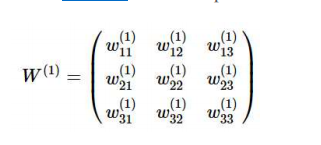

**Layer2 (Hidden layer to Output layer weights):**

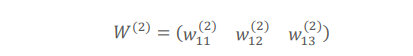

In [6]:
import numpy as np
w1 = np.array([[0.3, 0.3, 0.3], [0.7, 0.7, 0.7], [0.5, 0.5, 0.5]])
w2 = np.array([0.2, 0.2, 0.2])

## **Initialize Bias**

In [7]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.4])

## **Intilaize feature vector**

In [8]:
# X= [x1, x2, x3]

x = np.array([0.15, 0.65, 0.39])



---



---



# **Feed forward Pass**

Vectorisation in neural networks is an efficient implementation over, loop method. So, let's vectorize our previous equations.

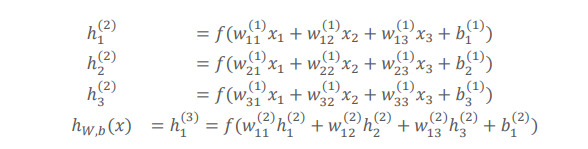
---

ie. above equations can be vectorized as,
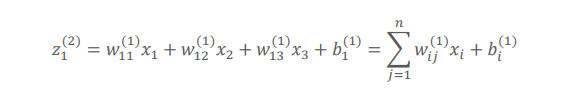

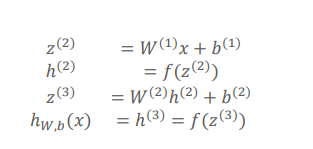

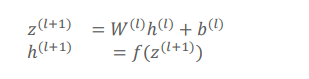

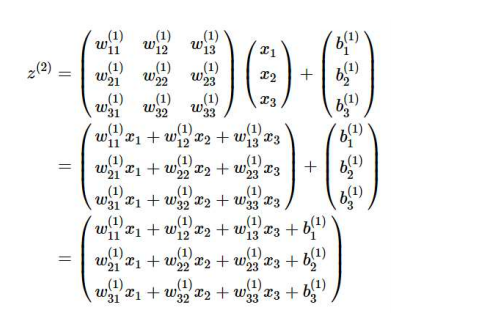


In [9]:
def FeedForward(n_layers, x, w, b):
  for layer in range(n_layers-1):
    if layer == 0: #ie. first layer(input layer)
      input_val = x
    else:
      input_val = h
    z = w[1].dot(input_val) + b[1]
    h = sigmoid_function(z)
  return h

# **Training ANN**

### **Gradient Descent and Optimization**

The idea of supervised learning is to provide many input-output pairs 
{**(x1, y1) , (x2, y2) , (x3,y3), .......(xm, ym)}** of known data and vary the weights based on these samples so that the error expression is minimised, where m is the number of training samples.

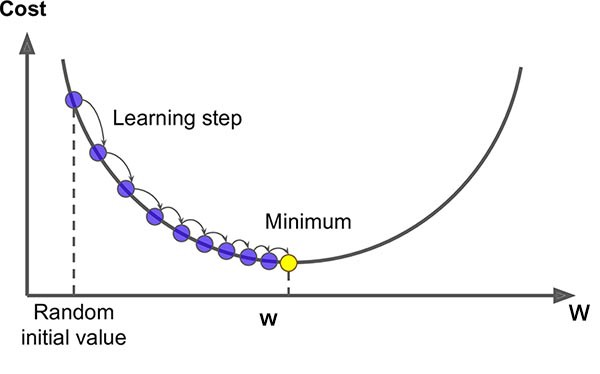


we start with some initial value of weights (w), which gives an error w.r.t expected output. We need to change w in a way to
approach that minimum possible error, the black cross. One of the most common ways of approaching that value is called gradient descent. 

The gradient descent method uses the gradient to make an informed step change in w to lead it towards the minimum of the error curve. This is an iterative method, that involves multiple steps. Each time, the w value is updated according to: 

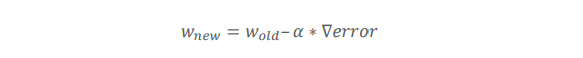

The step size alpha, is learning step that determine how quickly solution converges to minimum error – if it is too large, you can imagine the solution bouncing around on either side of
the minimum in the above diagram. This will result in an optimisation of w that does not
converge. As this iterative algorithm approaches the minimum, the gradient or change in
the error with each step will reduce.

The stopping of this iteration process is determined by stopping condition, **This
stop condition might be when the change in the error drops below a certain limit, often
called the precision**

## **But What to Minimize?**

This more general optimisation formulation revolves around minimising what’s
called the cost function.

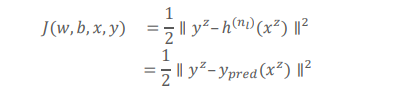


**Some notations,**

Screen Shot 1943-02-25 at 10.21.01 AM.png: Zth training Sample.
 
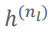: is the output of the
final layer of the neural network i.e. the output of the neural network.

The
two vertical lines represent the L2
 norm of the error, or what is known as the sum-ofsquares error (SSE)

**Therefore,the minimum mean squared error (MSE) over all the training samples:**

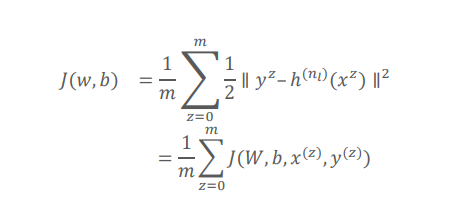

---
### **So, how do you use the cost function J above to train the weights of our network?**

### Using **Gradient Descent** and **Backpropagation.**

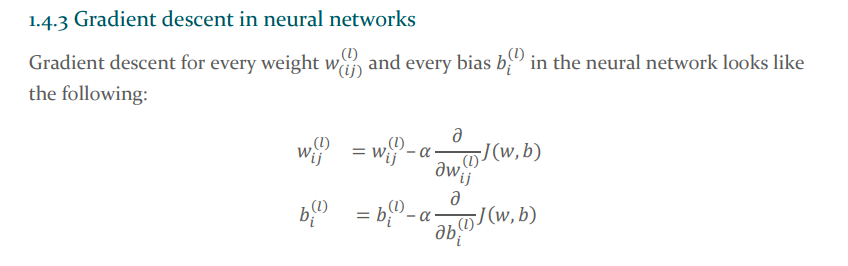

## **Back-Propagation**


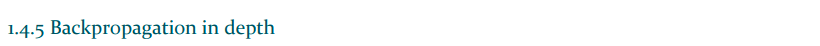


### **A bit of more MATHS.....**

Before moving forward, First let’s recall some of the foundational equations seen so far

- **Output of Neural Network:**

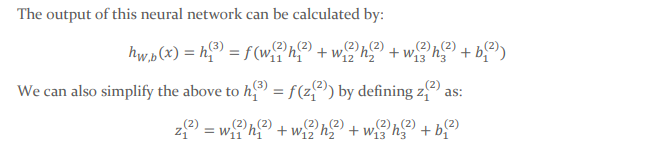


- **Cost Function**

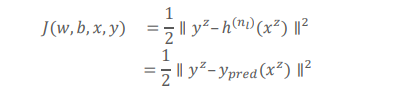

- **Gradient Descent**

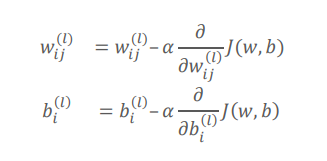

## **Let's start with Back-Propagation**
The main intution behind using Back-Propagation is to propogate the errors back and adjust the weight values to minimize the overall Error. 



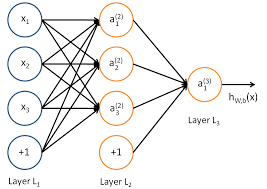


Let’s say we want to find out how much a change in the weight Screen Shot 1943-02-25 at 11.05.55 AM.png has on the cost
function J. This is to evaluate 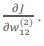 . To do so, we must use something called the chain
function: 

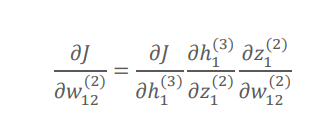




From Previous Equation,

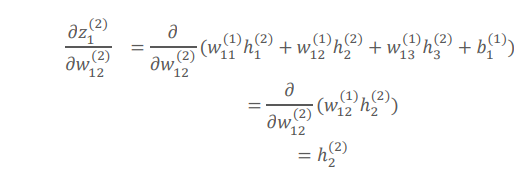


For partial derivative, only operates on one term within the
parentheses as other terms are independent of Screen Shot 1943-02-25 at 11.05.55 AM.png

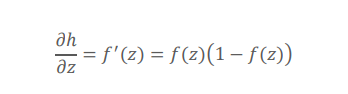

where f is activation function.

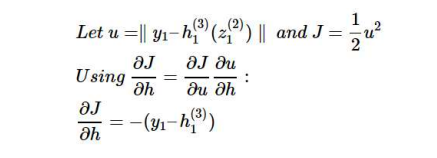

So, Final equation becomes,

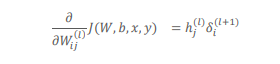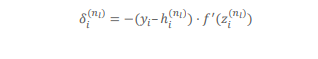

### **Propagating into the hidden layers**

What about for weights feeding into any hidden layers (layer 2 in our case)? For the weights connecting the output layer, the derivative made sense, as the
cost function can be directly calculated by comparing the output layer to the training data. The output of the hidden nodes, however, have no such direct reference, rather, they
are connected to the cost function only through mediating weights and potentially other
layers of nodes. How can we find the variation in the cost function from changes to
weights embedded deep within the neural network? As mentioned previously, we use the
backpropagation method.

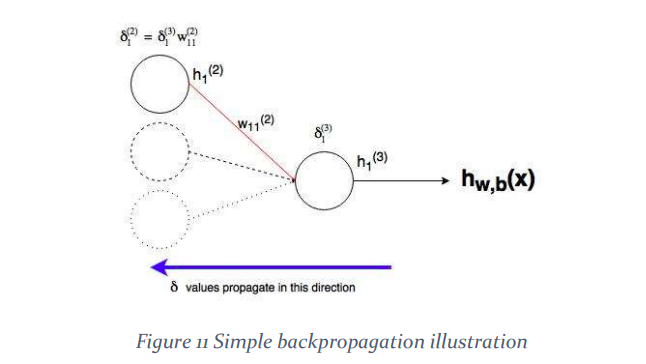

As can be observed from above, the output layer δ is communicated to the hidden node by
the weight of the connection. In the case 
generalised hidden layer δ is defined as: 

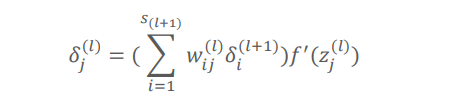

What about the bias weights? this can be generalized as same as that of weights:

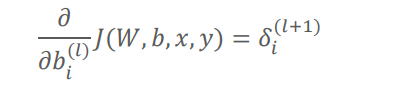

## **The Algorithm**

1. Randomly initialise the weights for each layer W and bias b.
2. while iterations < Stopping criteria:

    a)Set ΔW and Δb to zero 

    b) For samples 1 to m: 

       b.a) Perform a feed forward pass through all the n layers. Store the  activation function outputs ℎ.
       b.b) Calculate the value for the output layer.
       b.c) Use backpropagation to calculate the delta values for layers 2 to n − 1.
       b.d) Update the ΔW(l) and Δb(l) each layer.
       b.e) Perform a gradient descent step using: 
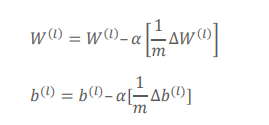




In [10]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# tqdm is progress-bar. make sure it's installed: pip install tqdm
from tqdm import tqdm
from IPython import display
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

In [11]:
history_train_losses = []
history_train_accuracies = []
history_test_losses = []
history_test_accuracies = []

In [12]:
size = [2, 8 , 1]
np.random.seed(1)
data = datasets.make_circles(n_samples=500, noise=0.025)
X = data[0]
y = np.expand_dims(data[1], 1)

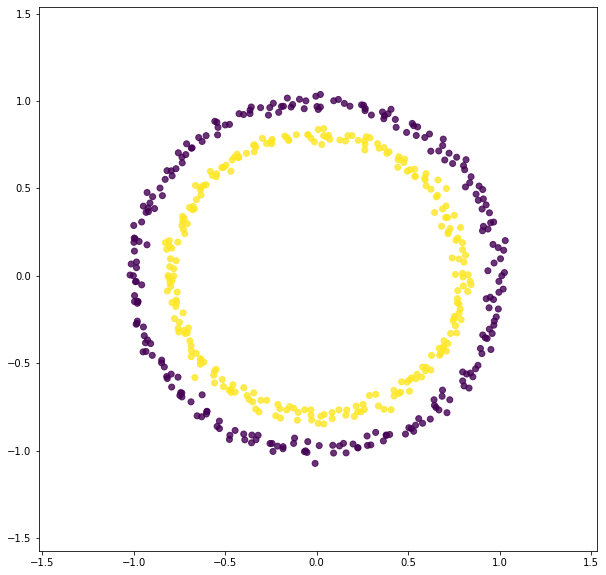

In [13]:
res = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                            np.arange(y_min, y_max, res))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1),  alpha=0.8)

In [14]:
#Randomly initialize weights and bias
weights = [np.random.randn(size[i], size[i-1]) * np.sqrt(1 / size[i-1]) for i in range(1, len(size))]
biases = [np.random.rand(n, 1) for n in size[1:]]


In [15]:
#Define Sigmoid Activation function
def activation(z, derivative=False):
    if derivative:
        return get_derivatives(z)
    else:
        return 1 / (1 + np.exp(-z))

#Find Derivatives
def get_derivatives(z):
  return activation(z) * (1 - activation(z))  #f'(z) = f(z) * (1 - f(z))
 
#Define Cost Function
def cost_function(y_true, y_pred):
    return (1./(2*y_pred.shape[1])) * np.sum((y_true - y_pred) ** 2)


In [16]:
#Define forward pass
def forward(input):
    a = input
    pre_activations = []
    activations = [a]
    for w, b in zip(weights,biases):
        z = np.dot(w, a) + b
        a  = activation(z)
        pre_activations.append(z)
        activations.append(a)
    return a, pre_activations, activations

In [17]:
def forward(input):
       
        a = input
        pre_activations = []
        activations = [a]
        for w, b in zip(weights,biases):
            z = np.dot(w, a) + b
            a  = activation(z)
            pre_activations.append(z)
            activations.append(a)
        return a, pre_activations, activations

def compute_deltas(pre_activations, y_true, y_pred):
        
        
        delta_L =  (y_pred - y_true) * activation(pre_activations[-1], derivative=True)
        deltas = [0] * (len(size) - 1)
        deltas[-1] = delta_L
        for l in range(len(deltas) - 2, -1, -1):
            delta = np.dot(weights[l + 1].transpose(), deltas[l + 1]) * activation(pre_activations[l], derivative=True) 
            deltas[l] = delta
        return deltas

def backpropagate(deltas, pre_activations, activations):
        dW = []
        db = []
        deltas = [0] + deltas
        for l in range(1, len(size)):
            dW_l = np.dot(deltas[l], activations[l-1].transpose()) 
            db_l = deltas[l]
            dW.append(dW_l)
            db.append(np.expand_dims(db_l.mean(axis=1), 1))
        return dW, db

def plot_decision_regions(X, y, iteration, train_loss, val_loss, train_acc, val_acc, res=0.01):
        X, y = X.T, y.T 
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                            np.arange(y_min, y_max, res))
        
        Z = predict(np.c_[xx.ravel(), yy.ravel()].T)
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.9,cmap  = 'Blues')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1),  alpha=0.8)
       


def predict(a):
        for w, b in zip(weights, biases):
            z = np.dot(w, a) + b
            a = activation(z)
        predictions = (a > 0.5).astype(int)
        return predictions

In [18]:
#Get the batches::

def get_Batches(batch_size, x_train, y_train):
    #Get the number of batches
    if x_train.shape[1] % batch_size == 0:
        n_batches = int(x_train.shape[1] / batch_size)
    else:
        n_batches = int(x_train.shape[1] / batch_size ) - 1

    batches_x = [x_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]
    batches_y = [y_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]
    return n_batches, batches_x, batches_y

In [23]:
def init_wb():
  return [np.zeros(w.shape) for w in weights],  [np.zeros(b.shape) for b in biases] 

def train( X, y, batch_size, epochs, learning_rate, print_every=10, plot_every=50):
      
        #Split the Dataset
        x_train, x_test, y_train, y_test = train_test_split(X.T, y.T, test_size= 0.2)
        x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T 
       
        for e in range(epochs):
            #Get number of batches, x_batch and y_batch
            n_batches, batches_x, batches_y = get_Batches(batch_size, x_train, y_train)
            dw_per_epoch, db_per_epoch = init_wb()
            train_losses = []
            test_losses = []
            train_accuracies = []
            test_accuracies = []
        
            for batch_x, batch_y in zip(batches_x, batches_y):
                batch_y_pred, pre_activations, activations = forward(batch_x)
                deltas = compute_deltas(pre_activations, batch_y, batch_y_pred)
                dW, db = backpropagate(deltas, pre_activations, activations)
                for i, (dw_i, db_i) in enumerate(zip(dW, db)):
                    dw_per_epoch[i] += dw_i / batch_size
                    db_per_epoch[i] += db_i / batch_size

                batch_y_train_pred = predict(batch_x)

                train_loss = cost_function(batch_y, batch_y_train_pred)
                train_losses.append(train_loss)
                train_accuracy = accuracy_score(batch_y.T, batch_y_train_pred.T)
                train_accuracies.append(train_accuracy)

                batch_y_test_pred = predict(x_test)

                test_loss = cost_function(y_test, batch_y_test_pred)
                test_losses.append(test_loss)
                test_accuracy = accuracy_score(y_test.T, batch_y_test_pred.T)
                test_accuracies.append(test_accuracy)


            # weight update
            for i, (dw_epoch, db_epoch) in enumerate(zip(dw_per_epoch, db_per_epoch)):
                weights[i] = weights[i] - learning_rate * dw_epoch
                biases[i] = biases[i] - learning_rate * db_epoch

            if plot_every:
                if e % plot_every == 0:
                    plot_decision_regions(x_train, y_train, e, 
                                                np.round(np.mean(train_losses), 2), 
                                                np.round(np.mean(test_losses), 2),
                                                np.round(np.mean(train_accuracies), 2), 
                                                np.round(np.mean(test_accuracies), 2), 
                                                )
                    plt.show()                    
                    display.display(plt.gcf())
                    display.clear_output(wait=True)
       
        plot_decision_regions(x_train, y_train, e, 
                                                np.round(np.mean(train_losses), 2), 
                                                np.round(np.mean(test_losses), 2),
                                                np.round(np.mean(train_accuracies), 2), 
                                                np.round(np.mean(test_accuracies), 2), 
                                                )        
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.show()

              

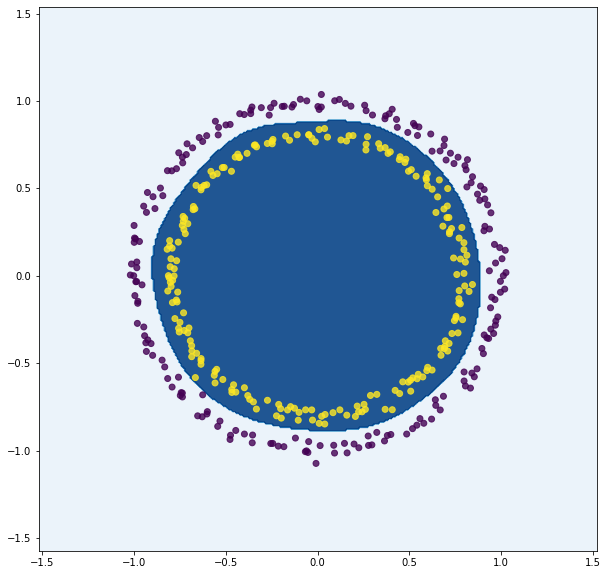

In [24]:

train(X=X.T, y=y.T, batch_size=16, epochs=2401, learning_rate=0.5, print_every=200,
                           plot_every=50)
